In [ ]:
import math
import time
import numpy as np
import torch
import matplotlib.pyplot as plt
import random

In [ ]:
class Timer:
  """Record Multiple Running Times."""

  def __init__(self):
    self.times = []
    self.start()
  
  def start(self):
    """start the timer."""
    self.tik = time.time()

  def stop(self):
    """ stop the timer and record the time in a list."""
    self.times.append(time.time() - self.tik)
    return self.times[-1]
  
  def avg(self):
    """Return the average time"""
    return sum(self.times) / len(self.times)
  
  def sum(self):
    """ Return the sum of time."""
    return sum(self.times)
  
  def cumsum(self):
    """Return the accumulated sum"""
    return np.array(self.times).cumsum().tolist()

In [ ]:
n = 10000
a = torch.ones(n)
b = torch.ones(n)
c = torch.ones(n)

In [ ]:
timer = Timer()

for i in range(n):
  c[i] = c[i] + b[i]
print(f'{timer.stop():.5f} sec')

0.22992 sec


In [ ]:
timer.start()
c = a+b
print(f'{timer.stop():.5f} sec')

0.00027 sec


# Normal Distribution

In [ ]:
def NormalFunction(x,mu,sigma):
  mulTerm = 1 / math.sqrt(2*math.pi * sigma**2)
  return mulTerm * np.exp(-0.5 / sigma**2 * (x - mu) ** 2)

0
0
3


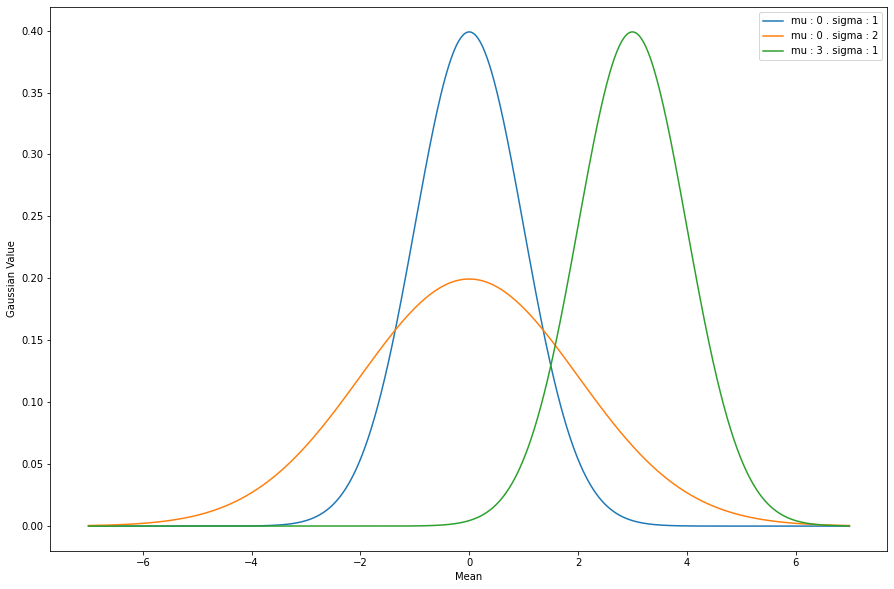

In [ ]:
X = np.arange(-7,7,0.01)
params = [(0,1),(0,2),(3,1)]

plt.figure(figsize=(15,10))
for mu , sigma in params:
  print(mu)
  plt.plot(X,NormalFunction(X,mu,sigma))
  plt.xlabel("Mean")
  plt.ylabel("Gaussian Value")

plt.legend([f'mu : {mu} . sigma : {sigma}' for mu , sigma in params])

# Creating Synthetic Data



*   y = Xw + b + Gaussian Error.



In [ ]:
def SyntheticData(w,b,NoOfExamples):
  X = torch.normal(0, 1,(NoOfExamples, len(w)))
  y = torch.matmul(X,w) + b
  y += torch.normal(0.,0.01,y.shape)
  return X,y.reshape((-1,1))

In [ ]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = SyntheticData(true_w, true_b, 2000)

In [ ]:
features.shape

torch.Size([2000, 2])

In [ ]:
print(f"features : {features[0]} ,'\n Lable : {labels[0]}")

features : tensor([ 0.6400, -0.1803]) ,'
 Lable : tensor([6.0922])


# Plotting the DataSet


*   Detach returns a new Tensor, detached from the current graph.
*   The result will never require gradient.


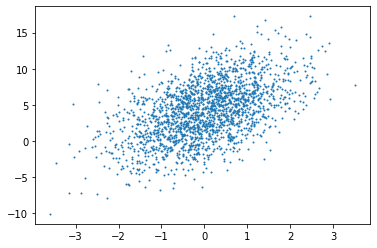

In [ ]:
plt.scatter(features[:,(0)].detach().numpy(),labels.detach().numpy(),1)

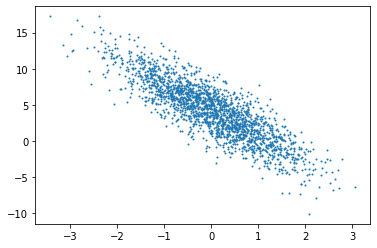

In [ ]:
plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),1)

# Reading the DataSet



*   In the Function DataIteration , we have used yield instead of return yield statement suspends function’s execution and sends a value back to the caller, but retains enough state to enable function to resume where it is left off. When resumed, the function continues execution immediately after the last yield run. This allows its code to produce a series of values over time, rather than computing them at once and sending them back like a list. 

In [ ]:
def DataIteration(batch_size, features, labels):
  numOfExamples = len(features)
  indices = list(range(numOfExamples))
  random.shuffle(indices)
  for index in range(0,numOfExamples,batch_size):
    batch_indices = torch.tensor(indices[index:min(index + batch_size , numOfExamples)])
    yield features[batch_indices], labels[batch_indices]

In [ ]:
batch_size = 10

for X , y in DataIteration(10,features,labels):
  print(X,'\n',y)
  break

tensor([[ 0.4952, -2.2667],
        [ 0.2797, -1.8901],
        [-0.5269, -0.3844],
        [ 1.1514, -0.6737],
        [ 0.7801, -0.0583],
        [-0.5474,  0.5550],
        [ 0.1080,  1.8762],
        [ 0.0948, -0.3326],
        [ 1.7732, -2.3703],
        [ 1.6062,  0.3458]]) 
 tensor([[12.8952],
        [11.1913],
        [ 4.4803],
        [ 8.7974],
        [ 5.9448],
        [ 1.2104],
        [-1.9445],
        [ 5.4948],
        [15.8161],
        [ 6.2199]])


# Initializing Model Parameters

In [ ]:
w = torch.normal(0,0.01,size=(2,1),requires_grad = True)
b = torch.zeros(1,requires_grad=True)

# Defining the Model

In [ ]:
def LinReg(X,w,b):
  return torch.matmul(X,w) + b

# Defining the  Loss Function

In [ ]:
def squaredLoss(y_hat,y):
  return(y_hat - y.reshape(y_hat.shape))**2 / 2

# Optmization Algorithm



*   grad computes and return the sum of gradients of outputs with respect to the inputs.
*   grad.zero_  sets the gradients of all optimized torch.tensors to zero.

*   no_grad - Context Manager that disabled gradient calculation.







In [ ]:
def sgd(params, lr ,batch_size):
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_()

# Training

In [ ]:
lr = 0.03
numberEpochs = 4

In [ ]:
for epoch in range(numberEpochs):
  for X,y in DataIteration(batch_size,features,labels):
    lossCalculated = squaredLoss(LinReg(X,w,b),y)

    lossCalculated.sum().backward()
    sgd([w,b],lr,batch_size)
  
  with torch.no_grad():
    train_loss = squaredLoss(LinReg(features,w,b),labels)
    print(f"epochs {epoch + 1} , loss :{train_loss.mean()}")

epochs 1 , loss :5.069545659353025e-05
epochs 2 , loss :5.093387153465301e-05
epochs 3 , loss :5.058652823208831e-05
epochs 4 , loss :5.045910074841231e-05


# Comparing

In [ ]:
print(f'error in estimating w :{true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b : {true_b - b}')

error in estimating w :tensor([1.9979e-04, 1.9789e-05], grad_fn=<SubBackward0>)
error in estimating b : tensor([-0.0002], grad_fn=<RsubBackward1>)


# Using torch APIs

In [ ]:
from torch.utils import data

In [ ]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [ ]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

In [ ]:
from torch import nn

In [ ]:
model = nn.Sequential(nn.Linear(2,1))

In [ ]:
model[0].weight.data.normal_(0,0.01)
model[0].bias.data.fill_(0)

tensor([0.])

In [ ]:
loss = nn.MSELoss()

In [ ]:
optimAlgo = torch.optim.SGD(model.parameters(),lr = 0.03)

In [ ]:
for epoch in range(numberEpochs):
  for X,y in data_iter:
    loss_ = loss(model(X),y)
    optimAlgo.zero_grad()
    loss_.backward()
    optimAlgo.step()
  
  loss_ = loss(model(features) ,labels)
  print(f'epoch {epoch + 1} , loss : {loss_}')

epoch 1 , loss : 0.00010119614307768643
epoch 2 , loss : 0.00010101779480464756
epoch 3 , loss : 0.00010101580119226128
epoch 4 , loss : 0.00010186887084273621


In [ ]:
w = model[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = model[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([-4.1246e-05,  6.1703e-04])
error in estimating b: tensor([0.0007])
